In [1]:
import sys
import os
path = os.path.abspath("lib")
sys.path.append(path)

import al_sus as al
from dyson import Sigma
import al as al_se

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools

# matplotlib intensity plot scale
tl_big = matplotlib.colormaps['twilight_shifted'].resampled(int(1e3))
tl_resc = ListedColormap(tl_big(np.linspace(0.075, 0.925, 10000)))

# Quantification of Compression

### Plot of compressed susceptibility

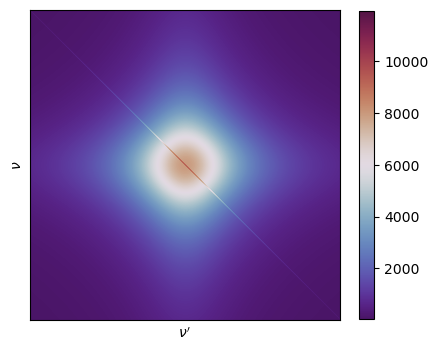

In [2]:
# compute chi 
u = 1
mu = u/2
niwf=256
beta=1000
chi_spin = al.chi_s(u, beta, u/2, niwf).real

# plot
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(chi_spin, cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$")
ax.set_ylabel(r"$\nu$")

#ax.set_title(rf"original $\chi_s$ for $\beta$={beta}", fontsize=10)

plt.savefig("graphics/compr_original.pdf", bbox_inches='tight')

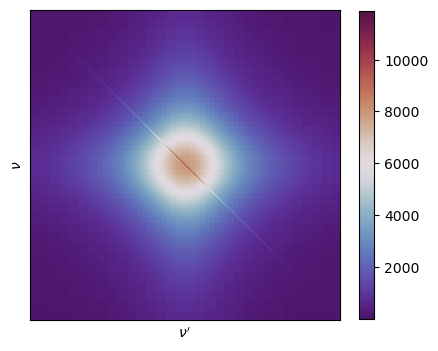

In [3]:
# pickled data to plot
data = pd.read_pickle("./data/ssim_cr_data.pkl")

beta = 1000
level = data['level'].max()  # max level
threshold = 0.99
pltdata = data[(data['beta']==beta) & (data['level']==level) & (data['threshold_quantile']==threshold)]['reconstruction_spin'].values[0]

# plot
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(pltdata, cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$") # set labels
ax.set_ylabel(r"$\nu$")

#ax.set_title(rf"reconstructed $\chi_s$ for $\beta$={beta}, $q$={threshold} and $l$={level}", fontsize=10)

plt.savefig(f"graphics/compr_rec.pdf", bbox_inches='tight')

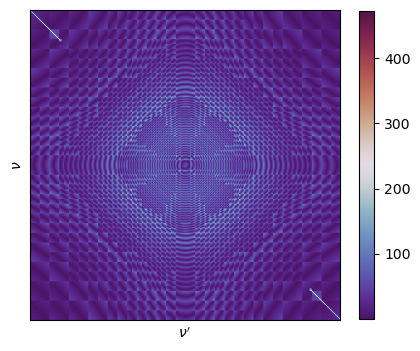

In [4]:
# plot
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.abs(pltdata-chi_spin), cmap=tl_resc)
fig.colorbar(im, ax=ax, shrink=0.8)

ax.set_xticks([]) # remove ticks
ax.set_yticks([])

ax.set_xlabel(r"$\nu'$") # set labels
ax.set_ylabel(r"$\nu$")

#ax.set_title(rf"$|\chi_s^{{original}}-\chi_s^{{reconstructed}}|$ for $\beta$={beta}, $q$={threshold} and $l$={level}", fontsize=9)

plt.savefig(f"graphics/compr_diff.pdf", bbox_inches='tight')

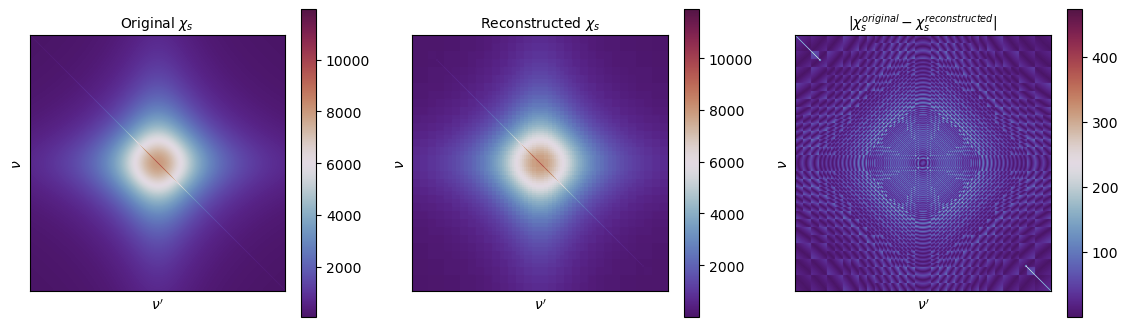

In [5]:
# create combined plot
fig, axs = plt.subplots(1,3, figsize=(14,5))

im = axs[0].imshow(chi_spin, cmap=tl_resc)
fig.colorbar(im, ax=axs[0], shrink=0.8)
axs[0].set_title(rf"Original $\chi_s$", fontsize=10)

im = axs[1].imshow(pltdata, cmap=tl_resc)
fig.colorbar(im, ax=axs[1], shrink=0.8)
axs[1].set_title(rf"Reconstructed $\chi_s$", fontsize=10)

im = axs[2].imshow(np.abs(pltdata-chi_spin), cmap=tl_resc)
fig.colorbar(im, ax=axs[2], shrink=0.8)
axs[2].set_title(rf"$|\chi_s^{{original}}-\chi_s^{{reconstructed}}|$", fontsize=10)

for ax in axs:
    ax.set_xticks([]) # remove ticks
    ax.set_yticks([])

    ax.set_xlabel(r"$\nu'$") # set labels
    ax.set_ylabel(r"$\nu$")
        
plt.savefig("graphics/compr_compare.pdf", bbox_inches="tight")

### Batch generation of heatmaps for CR and SSIM

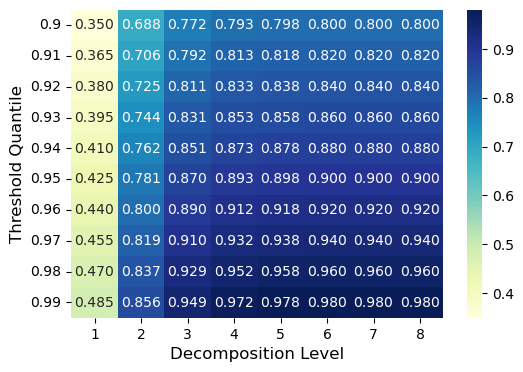

In [6]:
# test generation of one heatmap
sus = "spin"
beta = 1000
val = "compression"

heatmap_data = data[data['beta'] == beta].pivot_table(values=f'{val}_{sus}', index='threshold_quantile', columns='level')
heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])

# plot
plt.rcParams['figure.figsize'] = 6, 4
ax = sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.3f')
cbar = ax.collections[0].colorbar   # Get the colorbar
#plt.title("Rate of Compression", fontsize=15)
plt.xlabel('Decomposition Level', fontsize=12)
plt.ylabel('Threshold Quantile', fontsize=12)
plt.savefig("graphics/CR_sus.pdf", bbox_inches='tight')
plt.show()

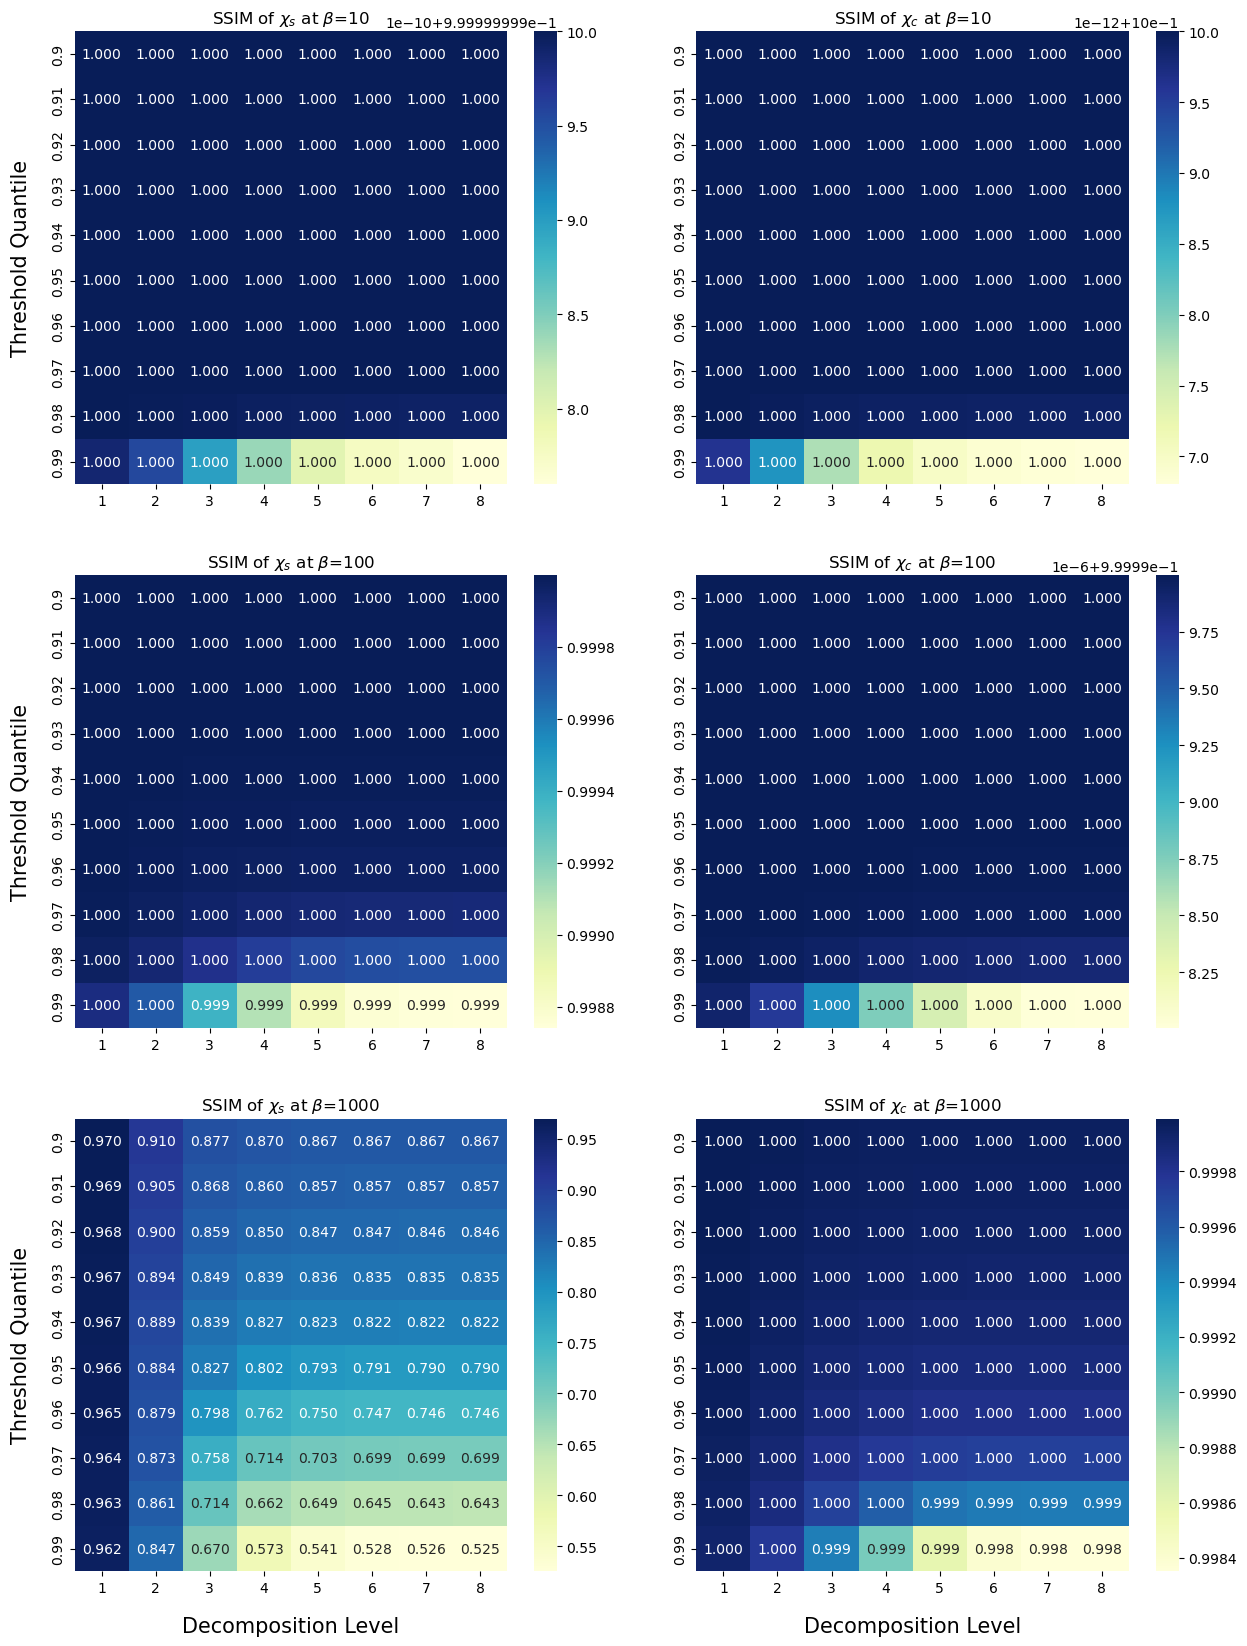

In [7]:
# make subplots for ssim
fig, axs = plt.subplots(3,2, figsize=(15,20), gridspec_kw={'hspace': 0.2, 'wspace':0.15})

for j,sus in enumerate(["spin", "charge"]):
    for i,beta in enumerate(data['beta'].unique()):
        heatmap_data = data[data['beta'] == beta].pivot_table(values=f'ssim_{sus}', index='threshold_quantile', columns='level')
        heatmap_data.index = heatmap_data.index.set_names(['thresholdquantile'])
        ax = sns.heatmap(heatmap_data, ax=axs[i,j], annot=True, cmap='YlGnBu', fmt='.3f')
        cbar = ax.collections[0].colorbar
        if j==0:
            axs[i,j].set_ylabel("Threshold Quantile", fontsize=15, labelpad=15) 
        else:
            axs[i,j].set_ylabel(None)
        if i==2:
            axs[i,j].set_xlabel("Decomposition Level", fontsize=15, labelpad=15)
        else:
            axs[i,j].set_xlabel(None)
        axs[i,j].set_title(rf"SSIM of $\chi_{sus[0]}$ at $\beta$={beta}")

plt.savefig("graphics/ssim_all.pdf", bbox_inches='tight')

# Spin vs Charge Susceptibility

In [8]:
# plotting settings

import scienceplots
plt.style.use(['science', 'no-latex'])
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.markersize'] = 8

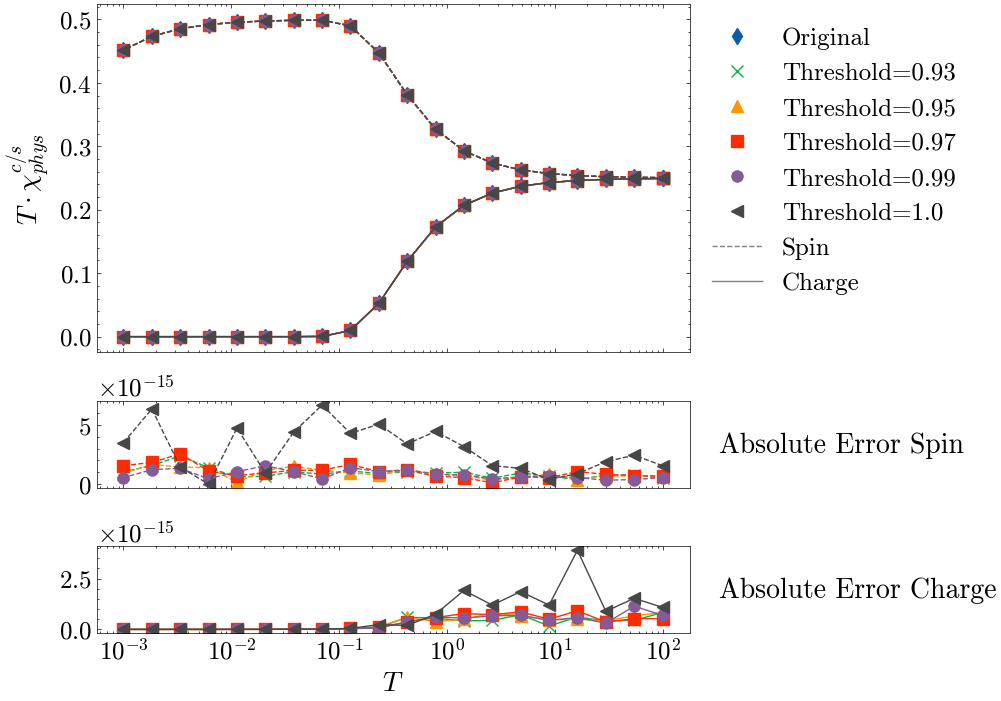

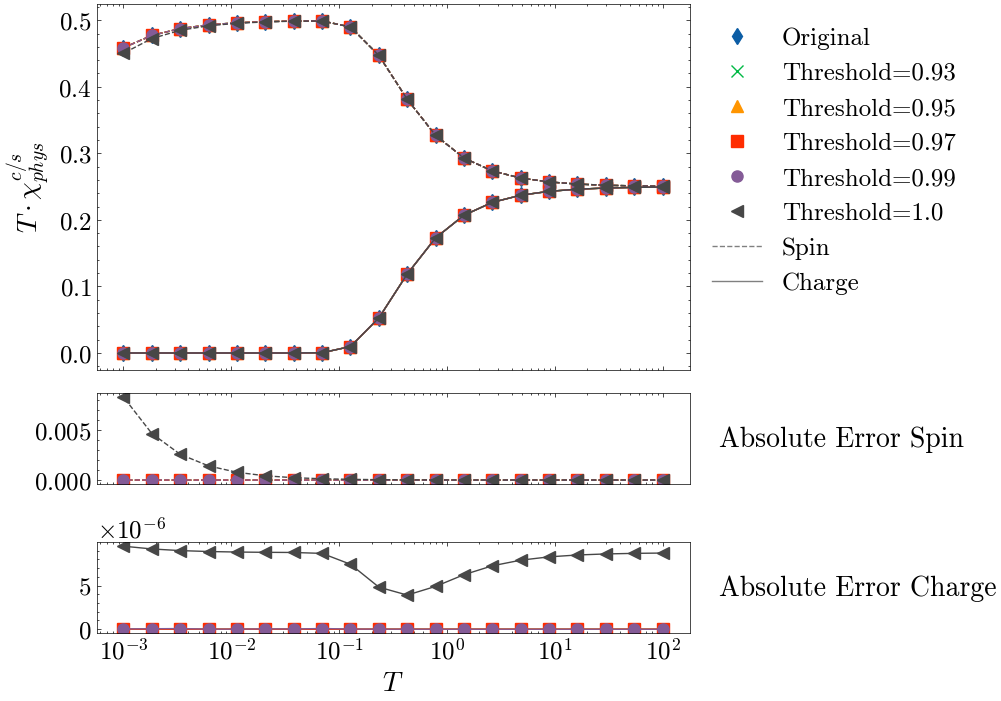

In [9]:
# read from file
df = pd.read_pickle("./data/sc_sep_data.pkl")

# Define a list of markers
markers = ['d', 'x', '^', 's', 'o', '<', '>', 'p', '*', '+']

# plot charge/spin susc.
for niwf in df['niwf'].unique():
    marker_cycler = itertools.cycle(markers)
    data = df.loc[df["niwf"] == niwf].copy()
    data.loc[:, '1/beta'] = 1 / data['beta']
    data.loc[:, 'T_phys_chi_charge'] = 1/data['beta'] * data['phys_chi_charge']
    data.loc[:, 'T_phys_chi_spin'] = 1/data['beta'] * data['phys_chi_spin']

    # Getting unique threshold values
    thresholds = data['threshold_quantile'].unique()

    # Create a new figure with three subplots, the top one being larger
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7), 
                                        gridspec_kw={'height_ratios': [4, 1, 1], 'hspace': 0.1}, 
                                        sharex=True, constrained_layout=True)

    # Extract the original data
    original_data = data[data['threshold_quantile'] == 0]
    orig_charge = original_data['T_phys_chi_charge'].values
    orig_spin = original_data['T_phys_chi_spin'].values

    # Looping over the unique threshold values
    for threshold in thresholds:
        temp_df = data[data['threshold_quantile'] == threshold]
        color = next(ax1._get_lines.prop_cycler)['color']
        marker = next(marker_cycler)

        # Plotting T_phys_chi_charge on ax1
        ax1.plot(temp_df['1/beta'], temp_df['T_phys_chi_charge'], color=color, marker=marker)

        # Plotting T_phys_chi_spin on ax1
        ax1.plot(temp_df['1/beta'], temp_df['T_phys_chi_spin'], color=color, linestyle='--', marker=marker)

        # Add legend entries
        if threshold == 0:
            ax1.plot([], [], color=color, marker=marker, linestyle='none', label=f'Original')
        else:
            ax1.plot([], [], color=color, marker=marker, linestyle='none', label=f'Threshold={threshold}')

            # Calculate differences and plot on ax2 and ax3
            diff_charge = np.abs(orig_charge - temp_df['T_phys_chi_charge'].values)
            diff_spin = np.abs(orig_spin - temp_df['T_phys_chi_spin'].values)

            ax3.plot(temp_df['1/beta'], diff_charge, color=color, marker=marker)
            ax2.plot(temp_df['1/beta'], diff_spin, color=color, linestyle='--', marker=marker)

    # Additional legend entries for spin/charge differentiation
    ax1.plot([], [], color='grey', linestyle='--', label='Spin') 
    ax1.plot([], [], color='grey', linestyle='-', label='Charge') 

    # Labels, scaling, and grids
    ax1.set_ylabel(r'$T \cdot \chi^{c/s}_{phys}$')
    ax3.set_ylabel('Charge Diff')
    ax2.set_ylabel('Spin Diff')
    ax3.set_xlabel(r'$T$')
    
    # Adjusting the x-axis for ax2 and ax3 to be on the right side
    ax3.set_ylabel("Absolute Error Charge", rotation=0, ha='left', va='center')
    ax3.yaxis.set_label_coords(1.05,0.5)
    ax3.yaxis.tick_left()

    ax2.set_ylabel("Absolute Error Spin", rotation=0, ha='left', va='center')
    ax2.yaxis.set_label_coords(1.05,0.5)
    ax2.yaxis.tick_left()
        
    for ax in [ax1, ax2, ax3]:
        ax.set_xscale('log')
        #ax.grid()

    # Adding the legend to ax1
    ax1.legend(bbox_to_anchor=(1, 1))

    # Save the plot
    plt.savefig(f'graphics/spin_charge_sep_{niwf}.pdf', bbox_inches='tight')

# Eigenvalues and Eigenvectors

### Number of Negative Eigenvalues

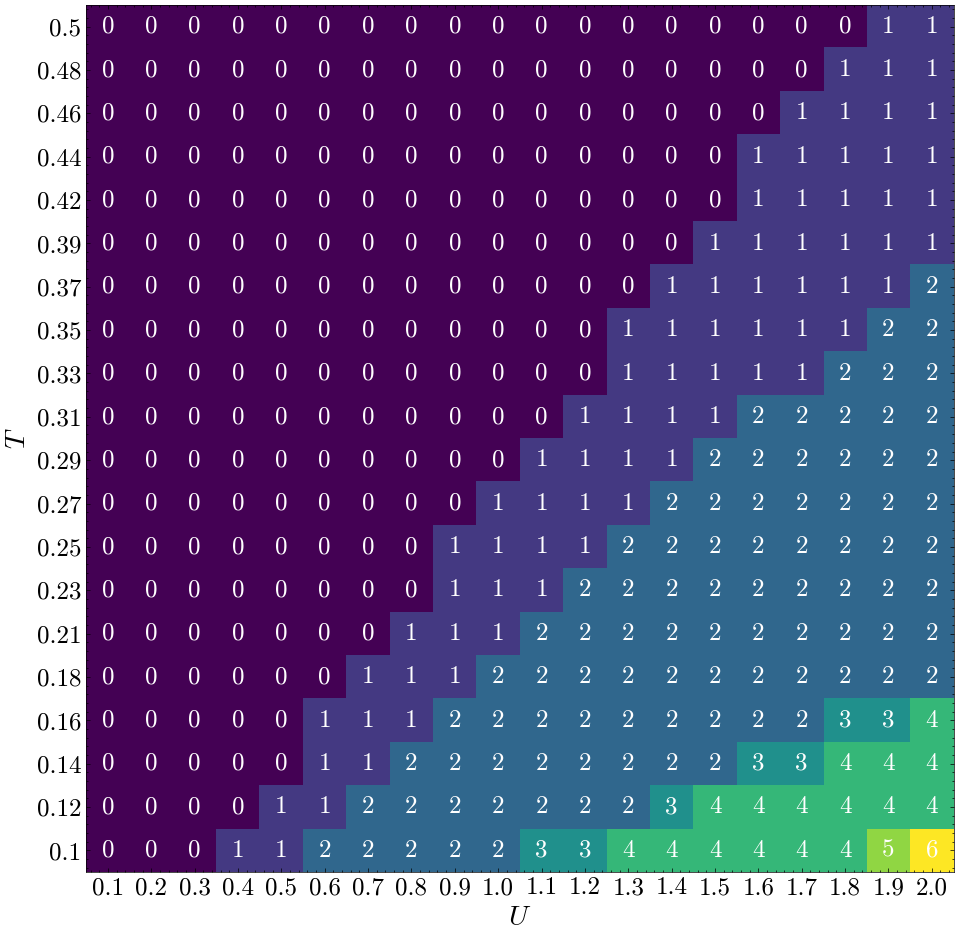

In [10]:
# loading the file
npzfile = np.load("./data/div_lines.npz")
num_evs_negative = npzfile['arr_0']
betas = npzfile['arr_1']
us = npzfile['arr_2']

# plot of vertex div lines
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(num_evs_negative, origin='lower')

ax.set_xticks(np.arange(len(us)))
ax.set_yticks(np.arange(len(betas)))

ax.set_xticklabels(np.round(us, 2))
ax.set_yticklabels(np.round(1/betas, 2))

ax.set_xlabel(r"$U$")
ax.set_ylabel(r"$T$")

for i in range(len(betas)):
    for j in range(len(us)):
        text = ax.text(j, i, num_evs_negative[i, j].astype(int),
                       ha="center", va="center", color="w")

fig.tight_layout()
plt.savefig('graphics/num_negative_evs.pdf', bbox_inches='tight')

### Analysis of First Eigenvector

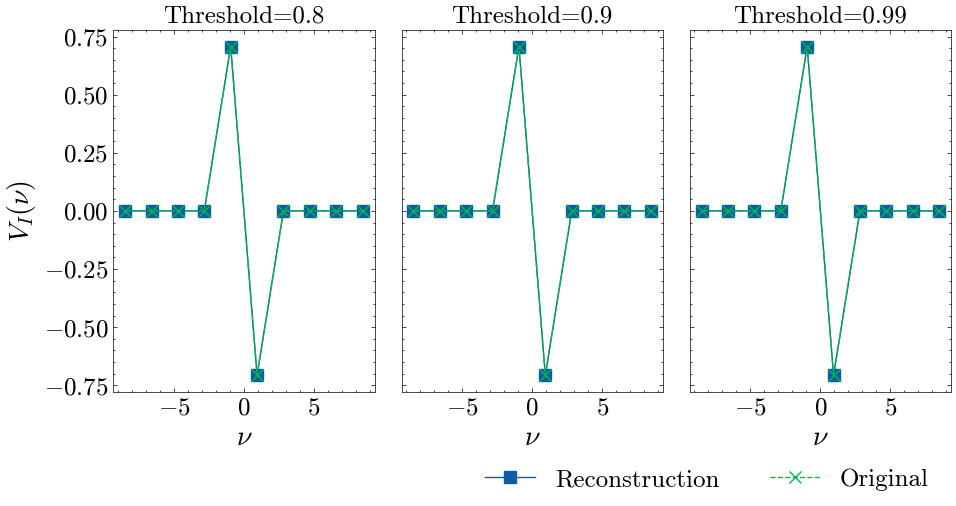

In [11]:
# load file
data = pd.read_pickle("./data/v1_data.pkl")

# plot of original and reconstructed EVs
fig, axs = plt.subplots(1, len(data), figsize=(10, 5), sharey=True)

axs = axs.flatten()
beta = 1/0.3
niwf = 1024
nu_offset = 5
nu_range = slice(niwf-nu_offset, niwf+nu_offset)
nu_values = (2*np.arange(-nu_offset, nu_offset)+1)*np.pi/beta

# Loop over each row in the DataFrame
for i, row in data.iterrows():
    axs[i].plot(nu_values, row['v_rec'][nu_range], label=f"Reconstruction", marker='s')
    axs[i].plot(nu_values, data.iloc[0]['v'][nu_range], label='Original', linestyle='--', marker='x')
    axs[i].set_title(f"Threshold={row['threshold']}")
    #axs[i].xaxis.set_ticks(nu_values[nu_values % 2 == 0])
    axs[i].set_xlabel(r"$\nu$")

# Set y-label on the first subplot
axs[0].set_ylabel(r"$V_I(\nu)$")

# Adjust layout for readability
plt.tight_layout()

# Optional: Add legend to the last plot
axs[-1].legend(bbox_to_anchor=(1, -0.15), ncol=2)

plt.savefig("graphics/first_ev.pdf", bbox_inches="tight")


# Vertex Frequency Box and Wavelet Basis

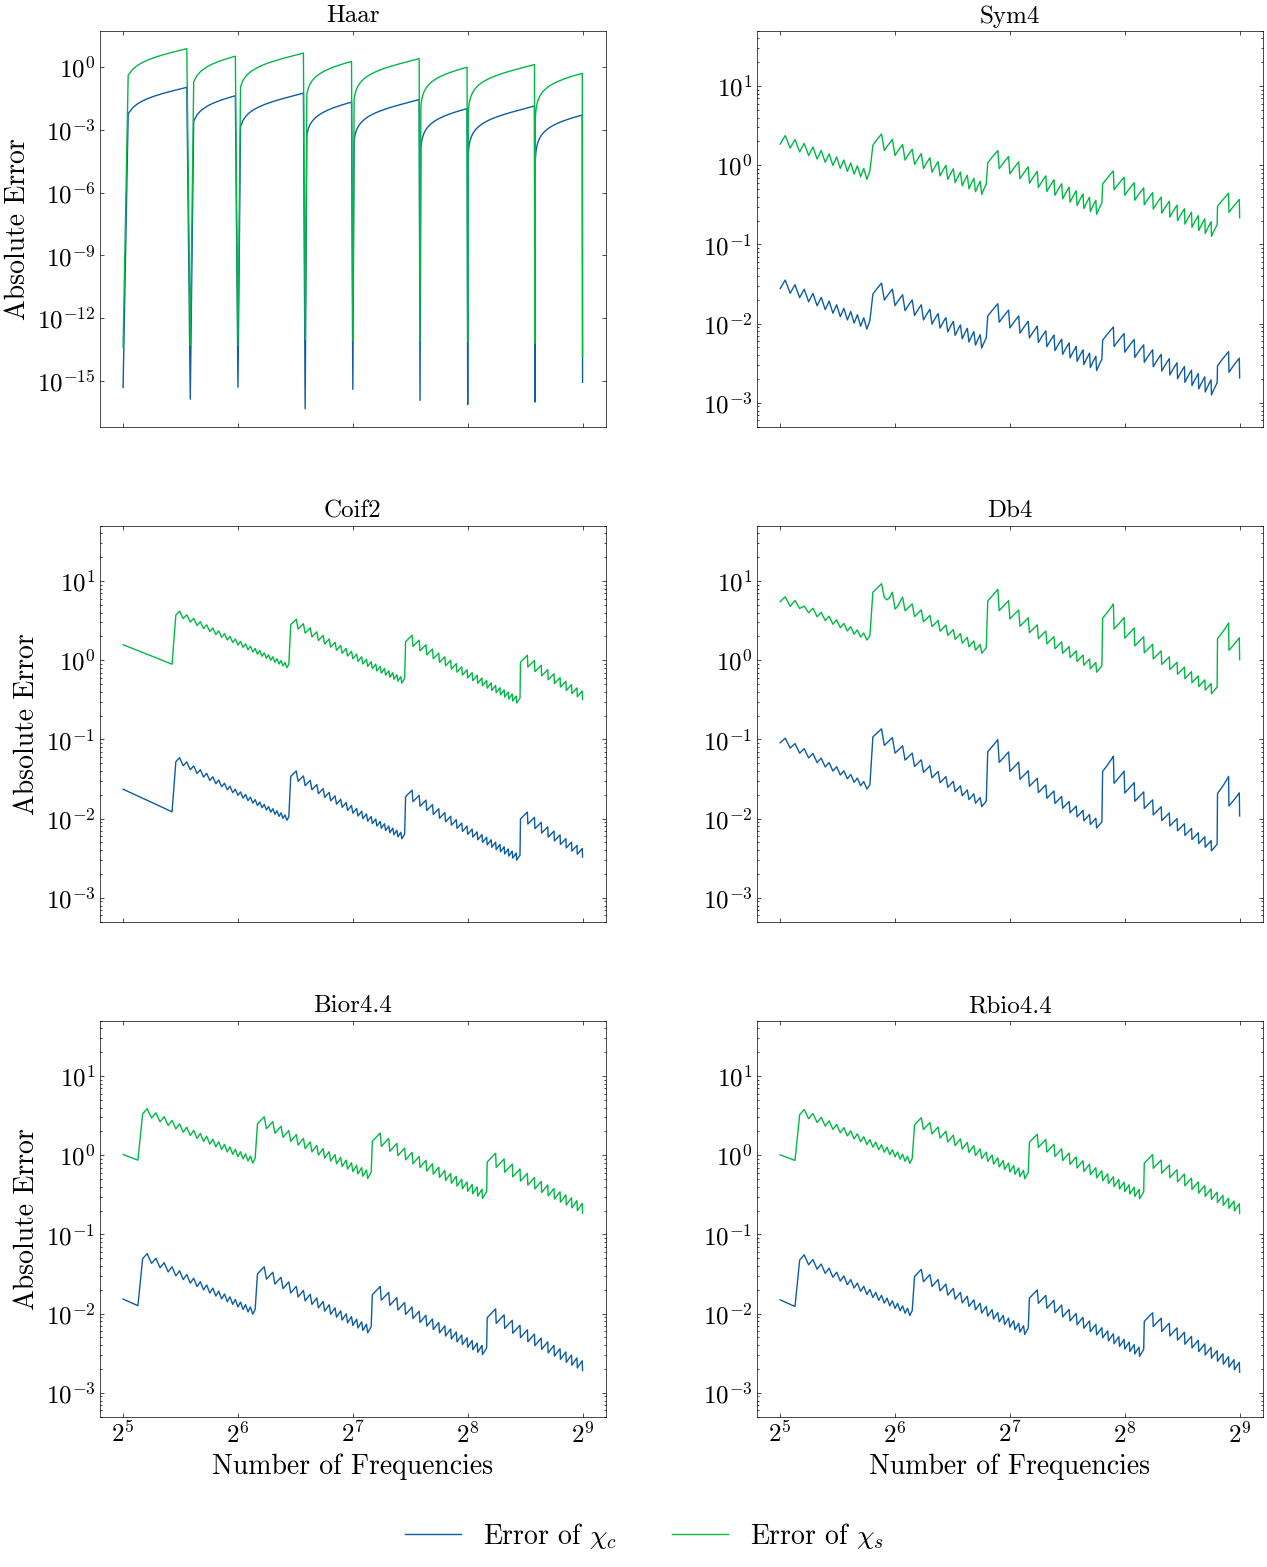

In [13]:
# load from file
q = 1.
data = pd.read_pickle(f"./data/freq_box_data_q{q}.pkl")

# plot error metrics
waveletbases = data['basis'].unique()
fig, axs = plt.subplots(3, len(waveletbases)//3, figsize=(15,18),
                        gridspec_kw={'wspace':0.3, 'hspace': 0.25}, sharey=False, sharex=True)
axs = axs.flatten()

# metric to plot
metric = "abs_err"

# loop over the df
for b_idx, basis in enumerate(waveletbases):
    tmp_df = data.loc[data['basis']==basis]
    
    axs[b_idx].plot(tmp_df["niwf"], tmp_df[f"{metric}_c"], label=r"Error of $\chi_c$")
    axs[b_idx].plot(tmp_df["niwf"], tmp_df[f"{metric}_s"], label=r"Error of $\chi_s$")
    if b_idx%2==0:
        axs[b_idx].set_ylabel("Absolute Error")
    if b_idx==len(waveletbases)-1 or b_idx==len(waveletbases)-2:
        axs[b_idx].set_xlabel("Number of Frequencies")
    axs[b_idx].set_yscale('log')
    axs[b_idx].set_xscale('log', base=2)
    axs[b_idx].set_title(f"{basis}".capitalize())
    
    # set scales
    if basis!='haar':
        axs[b_idx].set_ylim(5e-4, 5e1)
axs[b_idx].legend(ncol=2, bbox_to_anchor=(0.3, -0.2), prop={'size':20})
plt.savefig(f"graphics/wl_bases_err_q{q}.pdf", bbox_inches="tight")

# Compression of G2 in SDE

### Compression along 2d slices

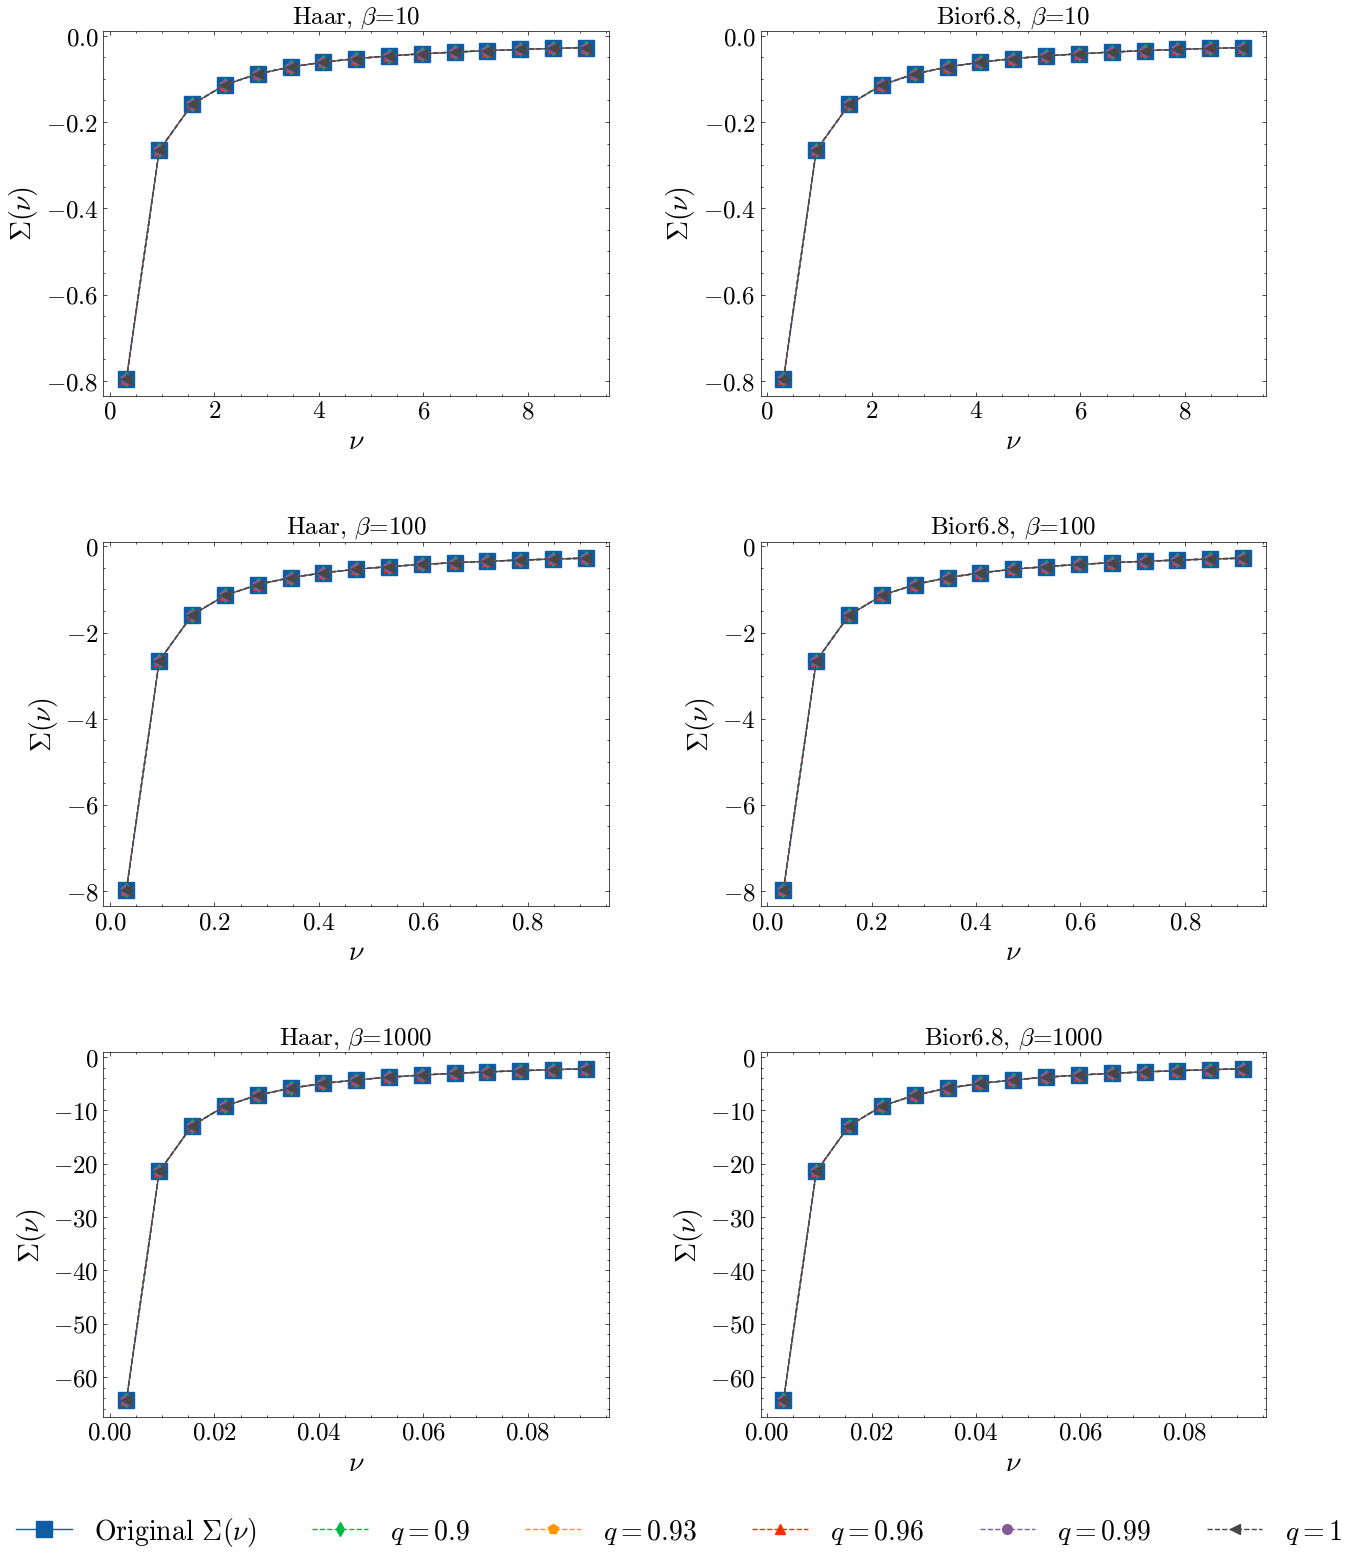

In [25]:
# load data
data = pd.read_pickle("./data/sde_2d_data.pkl")
niwf = 64

# plot
fig, axs = plt.subplots(3, 2, figsize=(15,18), gridspec_kw={'hspace': 0.4, 'wspace':0.3})

markers = ['s', 'd', 'p', '^', 'o', '<', '>', 'x', '*', '+']

for bidx, basis in enumerate(data['basis'].unique()):
    for beta_idx, beta in enumerate(data['beta'].unique()):
        for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
            pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
            niw=15
            nu = (2*np.arange(niw) + 1)*np.pi/beta
            if thresh==0:
                axs[beta_idx, bidx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
            else:
                axs[beta_idx, bidx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
            axs[beta_idx, bidx].set_xlabel(r"$\nu$")
            axs[beta_idx, bidx].set_ylabel(r"$\Sigma(\nu)$")
            axs[beta_idx, bidx].set_title(rf"{basis.capitalize()}, $\beta$={beta}")
            
axs[beta_idx, bidx].legend(ncol=len(data['threshold_quantile'].unique()), bbox_to_anchor=(1.2, -0.2), prop={'size':20})

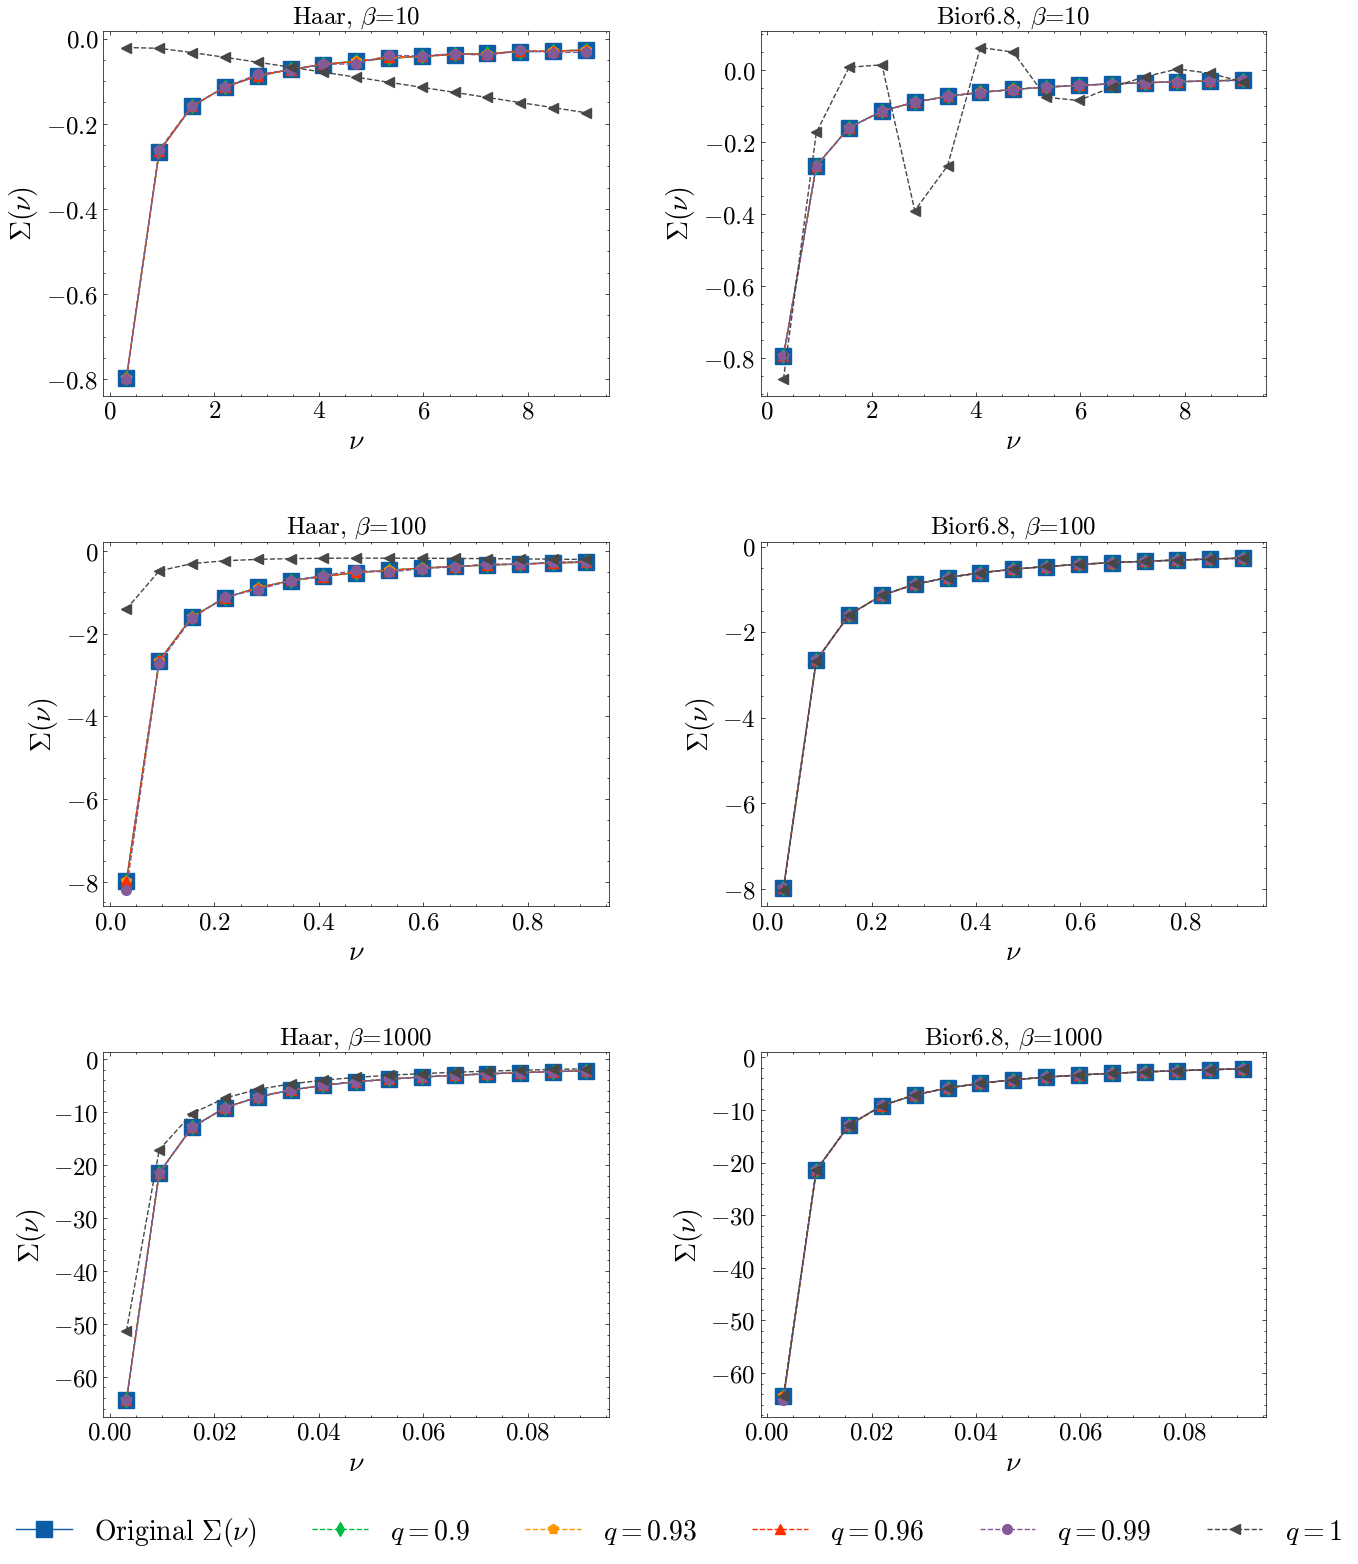

In [26]:
# load data
data = pd.read_pickle("./data/sde_3d_data.pkl")
niwf = 64

# plot
fig, axs = plt.subplots(3, 2, figsize=(15,18), gridspec_kw={'hspace': 0.4, 'wspace':0.3})

markers = ['s', 'd', 'p', '^', 'o', '<', '>', 'x', '*', '+']

for bidx, basis in enumerate(data['basis'].unique()):
    for beta_idx, beta in enumerate(data['beta'].unique()):
        for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
            pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
            niw=15
            nu = (2*np.arange(niw) + 1)*np.pi/beta
            if thresh==0:
                axs[beta_idx, bidx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
            else:
                axs[beta_idx, bidx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
            axs[beta_idx, bidx].set_xlabel(r"$\nu$")
            axs[beta_idx, bidx].set_ylabel(r"$\Sigma(\nu)$")
            axs[beta_idx, bidx].set_title(rf"{basis.capitalize()}, $\beta$={beta}")
axs[beta_idx, bidx].legend(ncol=len(data['threshold_quantile'].unique()), bbox_to_anchor=(1.2, -0.2), prop={'size':20})

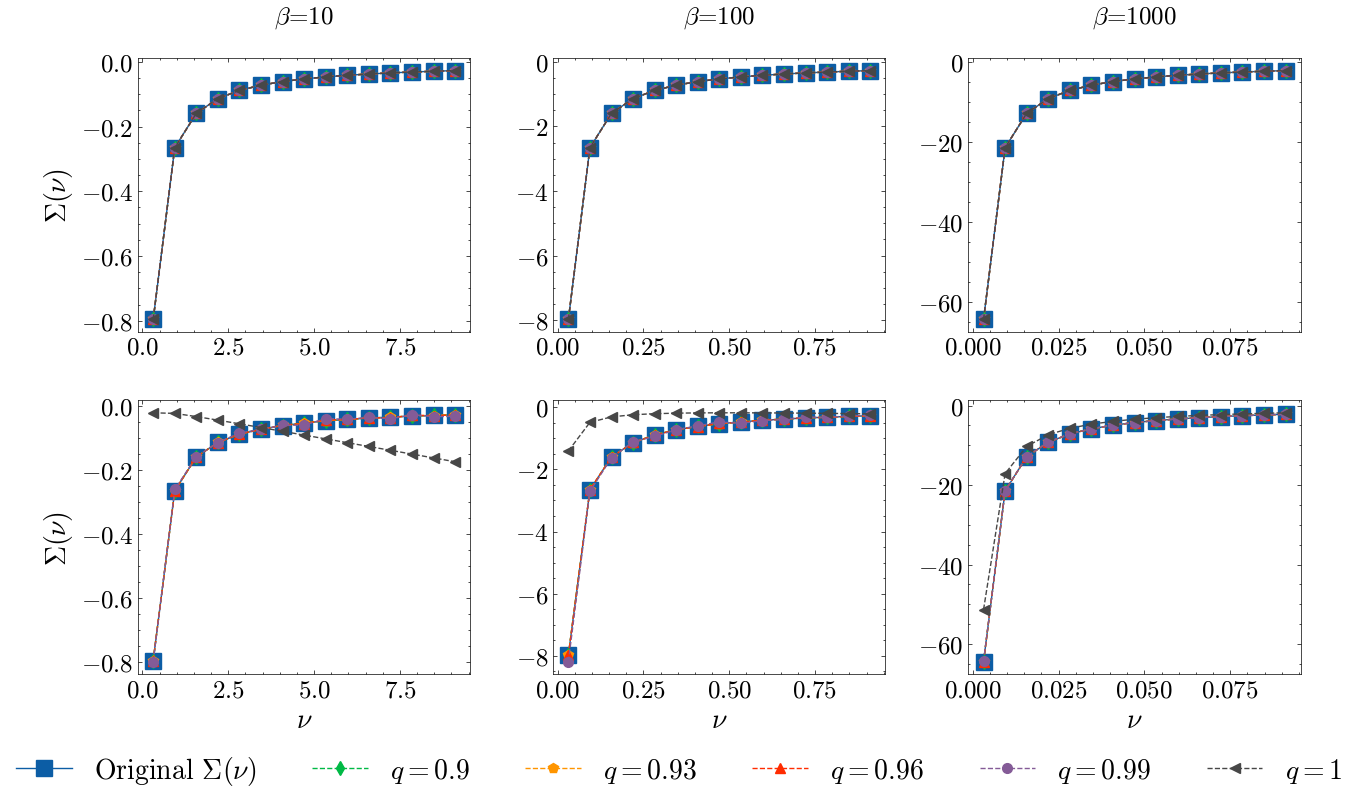

In [30]:
# plot to compare 2d and 3d compression
data_2d = pd.read_pickle("./data/sde_2d_data.pkl")
data_3d = pd.read_pickle("./data/sde_3d_data.pkl")
niwf=64

# plot
fig, axs = plt.subplots(2,3, figsize=(15,8), gridspec_kw={'hspace': 0.25, 'wspace':0.25})
markers = ['s', 'd', 'p', '^', 'o', '<', '>', 'x', '*', '+']
basis = "haar"

data = data_2d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        #axs[0,beta_idx].set_xlabel(r"$\nu$")
        axs[0,beta_idx].set_title(rf"$\beta$={beta}", y=1.1)
axs[0,0].set_ylabel(r"$\Sigma(\nu)$")

data = data_3d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        axs[1,beta_idx].set_xlabel(r"$\nu$")
axs[1,0].set_ylabel(r"$\Sigma(\nu)$")
axs[1,beta_idx].legend(ncol=len(data['threshold_quantile'].unique()), bbox_to_anchor=(1.2, -0.2), prop={'size':20})

plt.savefig("graphics/se_2d_3d.pdf", bbox_inches="tight")


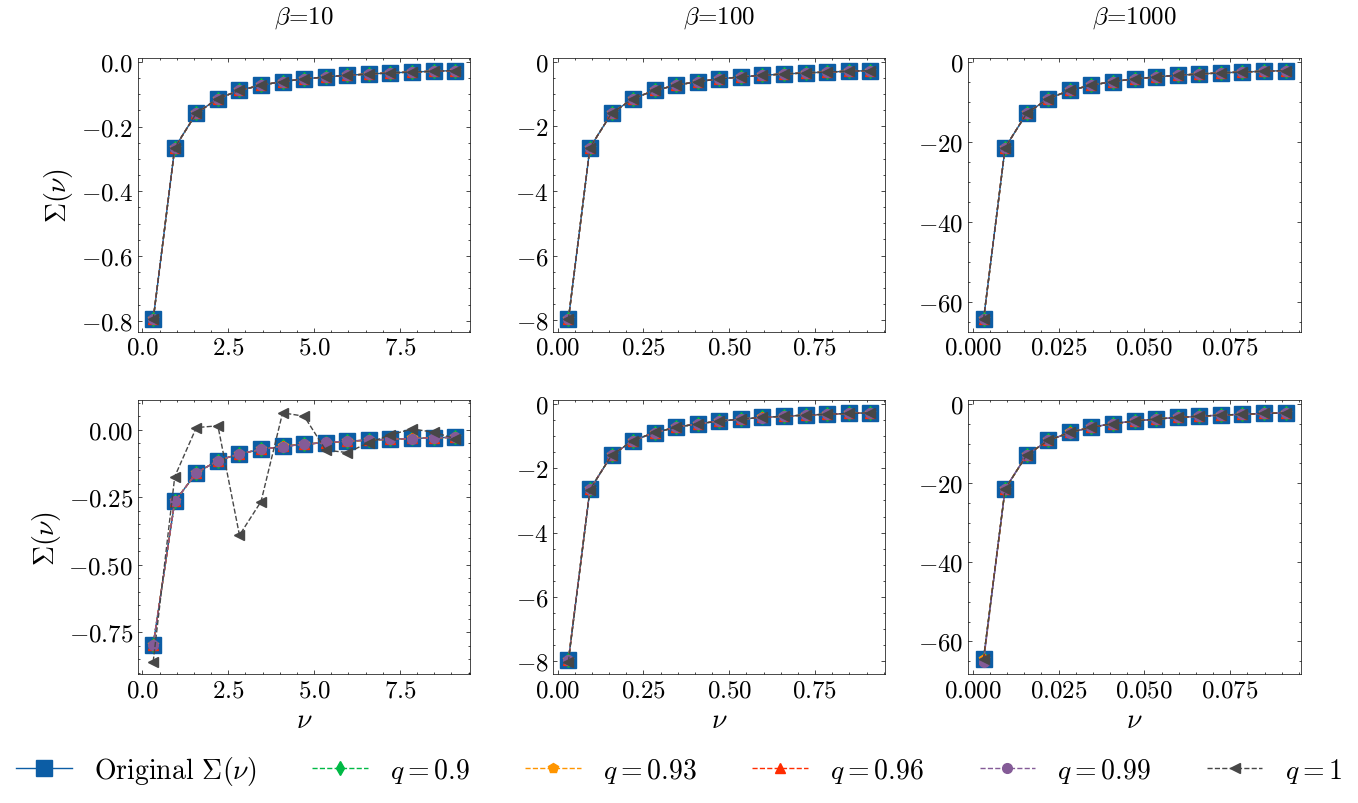

In [34]:
# plot to compare 2d and 3d compressio for biorth
data_2d = pd.read_pickle("./data/sde_2d_data.pkl")
data_3d = pd.read_pickle("./data/sde_3d_data.pkl")
niwf=64

# plot
fig, axs = plt.subplots(2,3, figsize=(15,8), gridspec_kw={'hspace': 0.25, 'wspace':0.25})
markers = ['s', 'd', 'p', '^', 'o', '<', '>', 'x', '*', '+']
basis = "bior6.8"

data = data_2d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[0,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        #axs[0,beta_idx].set_xlabel(r"$\nu$")
        axs[0,beta_idx].set_title(rf"$\beta$={beta}", y=1.1)
axs[0,0].set_ylabel(r"$\Sigma(\nu)$")

data = data_3d
for beta_idx, beta in enumerate(data['beta'].unique()):
    for t_idx, thresh in enumerate(data['threshold_quantile'].unique()):
        pltdata = data.loc[(data["basis"]==basis) & (data["beta"]==beta) & (data["threshold_quantile"]==thresh)]
        niw=15
        nu = (2*np.arange(niw) + 1)*np.pi/beta
        if thresh==0:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ms=12, label=r"Original $\Sigma(\nu)$")
        else:
            axs[1,beta_idx].plot(nu, pltdata["selfenergy"].to_numpy()[0].imag[niwf:niwf+niw], marker=markers[t_idx], ls="--", ms=7, label=rf"$q=${thresh}")
        axs[1,beta_idx].set_xlabel(r"$\nu$")
axs[1,0].set_ylabel(r"$\Sigma(\nu)$")
axs[1,beta_idx].legend(ncol=len(data['threshold_quantile'].unique()), bbox_to_anchor=(1.2, -0.2), prop={'size':20})

plt.savefig("graphics/se_2d_3d_bior.pdf", bbox_inches="tight")


# Preservation of centrosymmetry

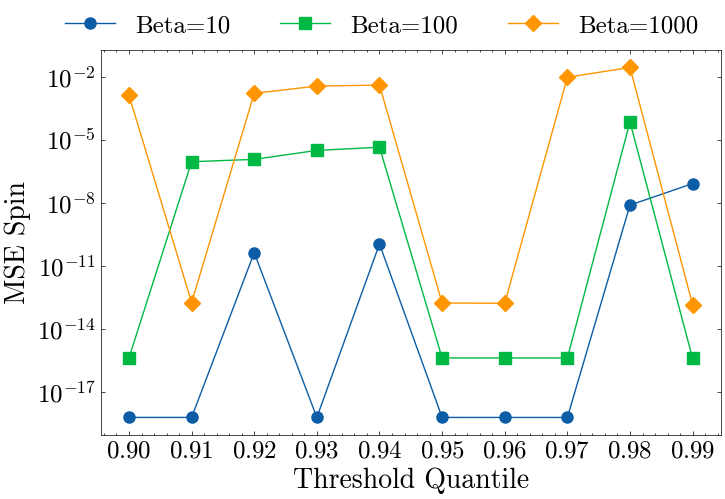

In [31]:
# load data
df = pd.read_pickle("./data/sym_data.pkl")

# Create a figure and an axis for the plot.
fig, ax = plt.subplots(figsize=(8,5))

# Define markers for different betas.
markers = ['o', 's', 'D'] # Circle, square, diamond.

# Plot a line for each beta value.
for beta, marker in zip(df['beta'].unique(), markers):
    temp_df = df[df['beta'] == beta]
    ax.plot(temp_df['threshold_quantile'], temp_df['mse_spin'], marker=marker, label=f'Beta={beta}')

# Set the y-axis to be logarithmic.
ax.set_yscale('log')

# Adding labels and title.
plt.xlabel('Threshold Quantile')
plt.ylabel('MSE Spin')

ax.set_xticks(df['threshold_quantile'].unique())


ax.legend(bbox_to_anchor=(1, 1.15), ncol=3)

# Show the plot.
plt.savefig('graphics/symmetry_spin.pdf', bbox_inches='tight')

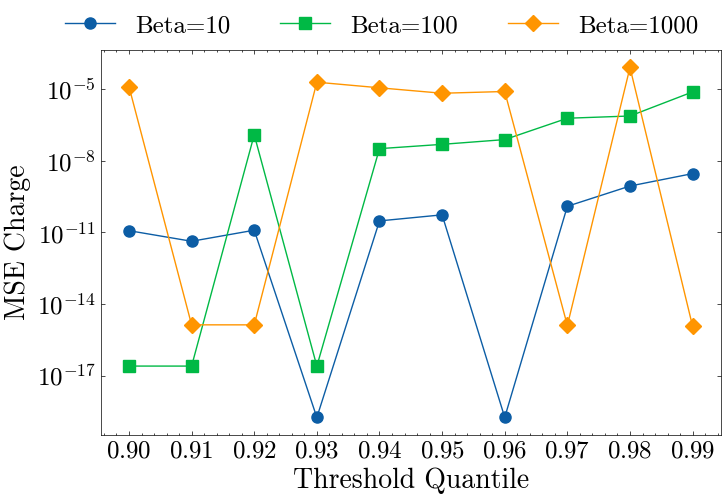

In [32]:
# Create a figure and an axis for the plot.
fig, ax = plt.subplots(figsize=(8,5))

# Define markers for different betas.
markers = ['o', 's', 'D'] # Circle, square, diamond.

# Plot a line for each beta value.
for beta, marker in zip(df['beta'].unique(), markers):
    temp_df = df[df['beta'] == beta]
    ax.plot(temp_df['threshold_quantile'], temp_df['mse_charge'], marker=marker, label=f'Beta={beta}')

# Set the y-axis to be logarithmic.
ax.set_yscale('log')

# Adding labels and title.
plt.xlabel('Threshold Quantile')
plt.ylabel('MSE Charge')

ax.set_xticks(df['threshold_quantile'].unique())

ax.legend(bbox_to_anchor=(1, 1.15), ncol=3)

# Show the plot.
plt.savefig('graphics/symmetry_charge.pdf', bbox_inches='tight')

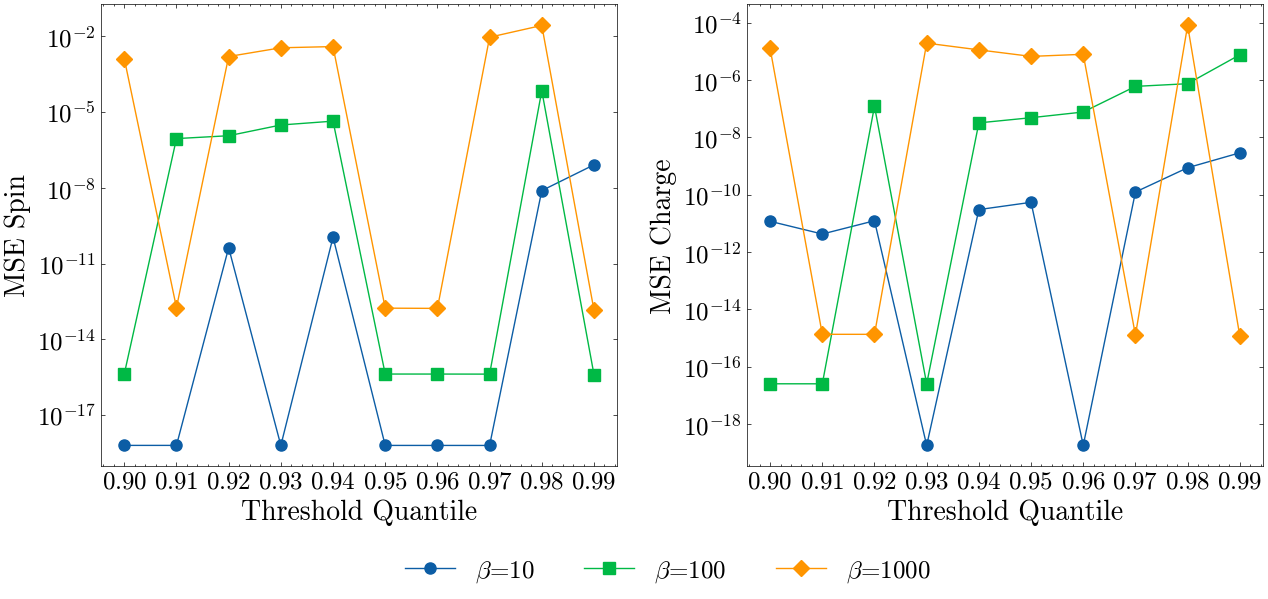

In [33]:
# load data
df = pd.read_pickle("./data/sym_data.pkl")

# combined plot for charge and spin symmetry
fig, axs = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'wspace':0.25})

# Define markers for different betas.
markers = ['o', 's', 'D'] # Circle, square, diamond.

# Plot a line for each beta value.
for beta, marker in zip(df['beta'].unique(), markers):
    temp_df = df[df['beta'] == beta]
    axs[0].plot(temp_df['threshold_quantile'], temp_df['mse_spin'], marker=marker, label=f'Beta={beta}')

# Set the y-axis to be logarithmic.
axs[0].set_yscale('log')

# Adding labels and title.
axs[0].set_xlabel('Threshold Quantile')
axs[0].set_ylabel('MSE Spin')

axs[0].set_xticks(df['threshold_quantile'].unique())

# Plot a line for each beta value.
for beta, marker in zip(df['beta'].unique(), markers):
    temp_df = df[df['beta'] == beta]
    axs[1].plot(temp_df['threshold_quantile'], temp_df['mse_charge'], marker=marker, label=rf'$\beta$={beta}')

# Set the y-axis to be logarithmic.
axs[1].set_yscale('log')

# Adding labels and title.
axs[1].set_xlabel('Threshold Quantile')
axs[1].set_ylabel('MSE Charge')

axs[1].set_xticks(df['threshold_quantile'].unique())
axs[1].legend(bbox_to_anchor=(0.4, -0.15), ncol=3)

plt.savefig("graphics/sym_sc_comp.pdf", bbox_inches="tight")